In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
import matplotlib.backends.backend_pdf

In [3]:
import geopandas as gpd

In [4]:
import matplotlib as mpl

# LSFF: Generate data coverage maps

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.name = world.name.astype(str)

world.loc[world.name=="Dem. Rep. Congo",'name'] = 'Democratic Republic of the Congo'
world.loc[world.name=="Tanzania",'name'] = 'United Republic of Tanzania'

In [6]:
data_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/data_counts_nutrient_na.csv'

df = pd.read_csv(data_path)
df.value_description.unique()

array(['percent of market covered by fortified product',
       'percent of population eating fortified vehicle',
       'percent of population eating industrially produced vehicle',
       'percent of population eating vehicle',
       'percent of vehicle that is fortified',
       'percent of vehicle that is industrially produced'], dtype=object)

In [9]:
def plot_one_vehicle(data, var, vehicle):
    
    vehicle_name = vehicle
    vehicle = vehicle.replace(" ","_")

    fig, ax = plt.subplots(figsize=(30,10))

    ax.set_aspect('equal')
    ax.set_title(f'Data coverage: {var} ({vehicle_name})', fontsize = 24)
    
    
    data.rename(columns = {'name':'location_name'}, inplace=True)
    locs_needed = list(df[(df.value_description==var) & (df.vehicle==vehicle_name)].location_name)
        
    base = world[world.continent.isin(['Africa','Asia'])].plot(ax=ax, color='white', edgecolor='gray')
    if len(data[data[vehicle].isna()])>0:
        
        cmap = plt.cm.get_cmap('summer_r', 5) #blue colorscale, discretized to 5 bins
        norm = mpl.colors.Normalize(vmin=0,vmax=101) #normalize color scale
        me = data.plot(ax=base,
                       column=vehicle,
                       cmap=cmap,
                       norm=norm,
                       legend=True,
                       legend_kwds = {'ticks':np.arange(0,101,100/5)},
                       edgecolor = 'gray',
                       label = vehicle)

    data[(data.location_name.isin(locs_needed)) &
         (data[vehicle].isna())].plot(ax=base, color = 'gray', edgecolor = 'white')
    
#     for i, row in data[data[vehicle].notna()].iterrows():
#         x, y = row.geometry.centroid.x, row.geometry.centroid.y
#         label = str(row[vehicle]) #f'{str(row[vehicle])}, {row.location_name}'
#         plt.text(x, y, label, fontsize = 12)

    return fig

In [16]:
# plot_one_vehicle(pct_vehicle_indust_prod, 'percent of vehicle that is industrially produced', vehicle = 'wheat flour')

In [10]:
def plot_one_var(var, save_path):
    
    # create df with each vehicle one column
    data = df[df.value_description==var]
    data = data.pivot(index='location_name',columns='vehicle')['mean_mean']
    data['var_name'] = var
    
    # add shapefiles
    data = world.merge(data, left_on='name', right_on='location_name', how = 'right')
    data.rename(columns={'maize flour':'maize_flour','wheat flour':'wheat_flour'}, inplace=True)
    
    pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)
    for vehicle in ['maize flour', 'oil', 'wheat flour', 'bouillon', 'salt', 'rice']:
        if len(data[data[vehicle.replace(" ","_")].notna()])>0:
            fig = plot_one_vehicle(data, var, vehicle)
            pdf.savefig(fig)
    pdf.close()

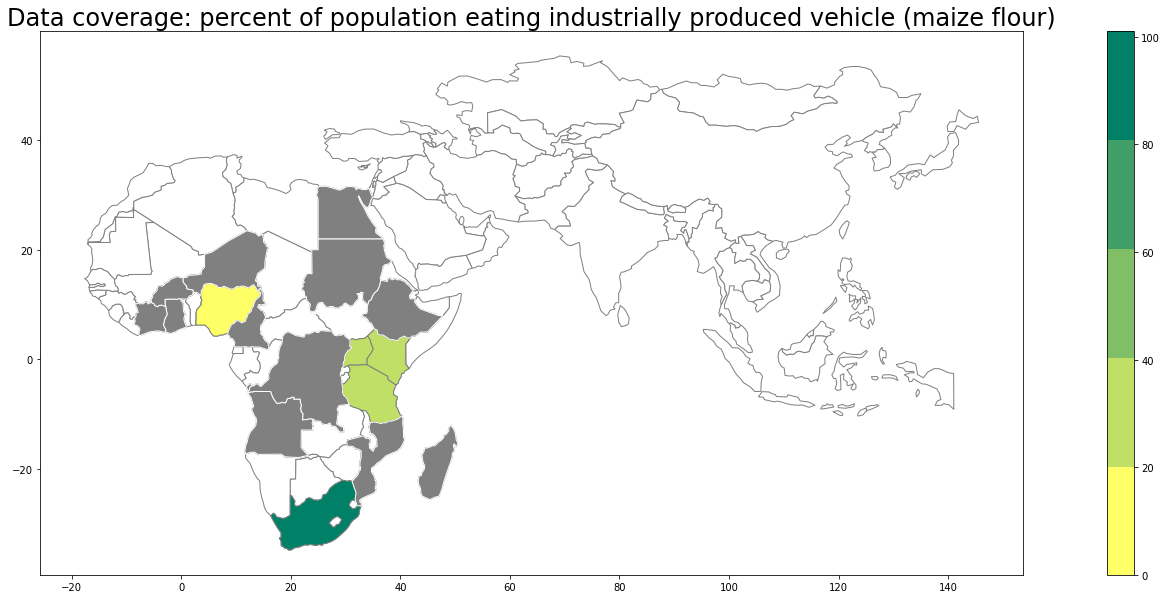

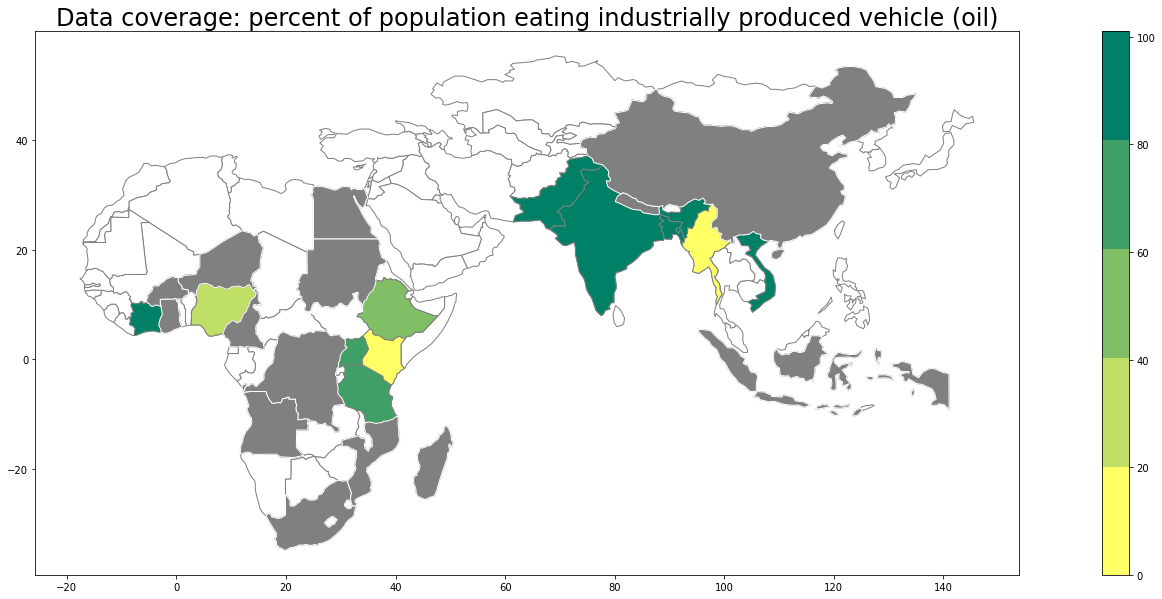

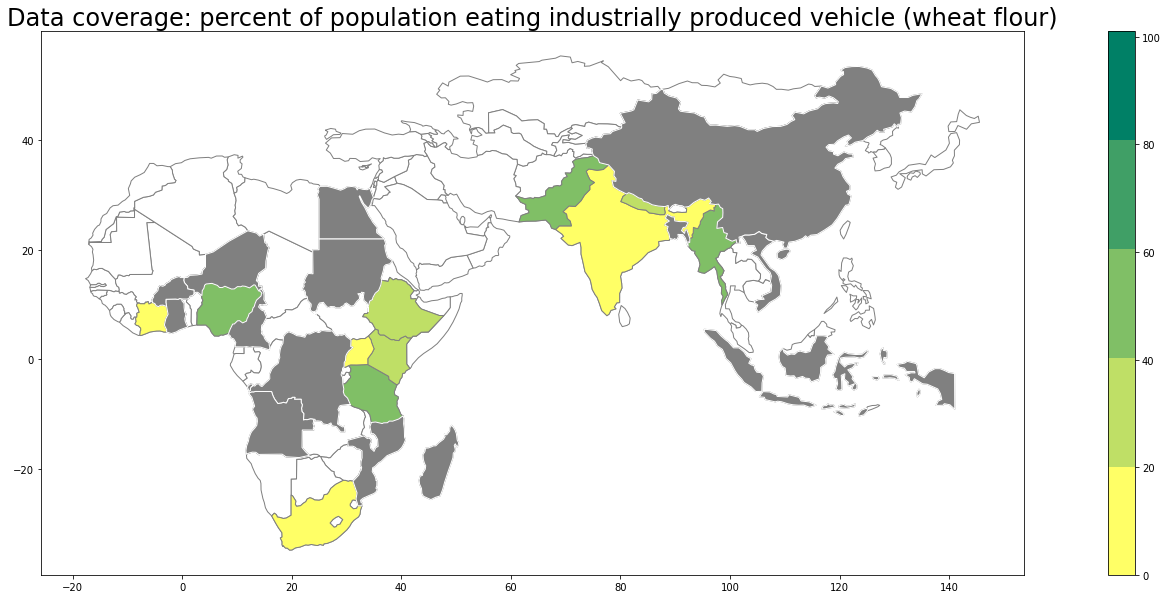

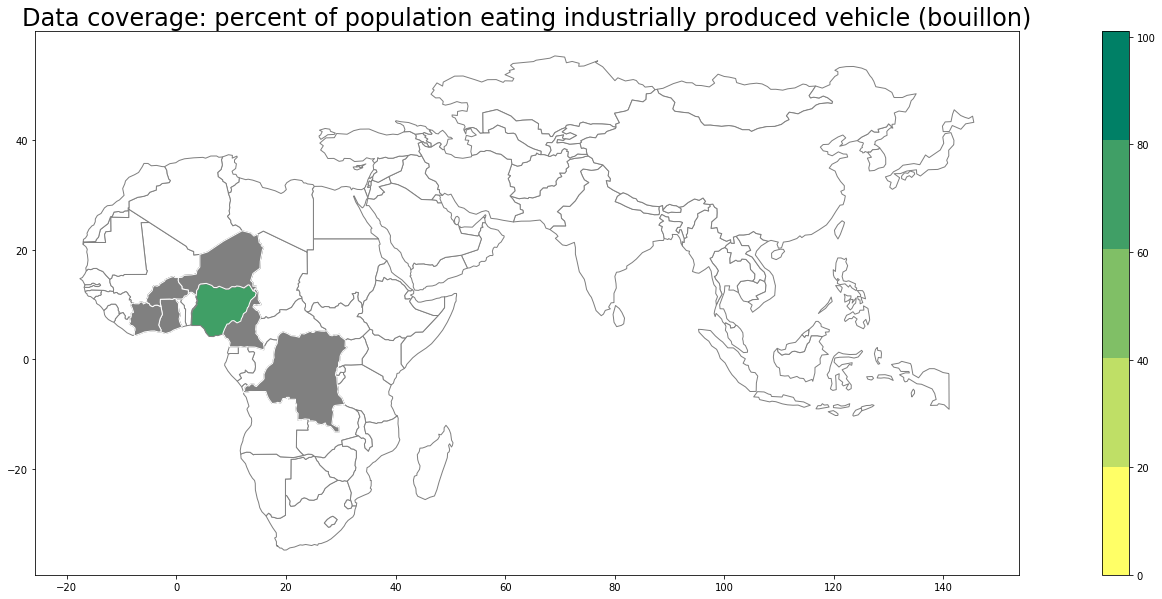

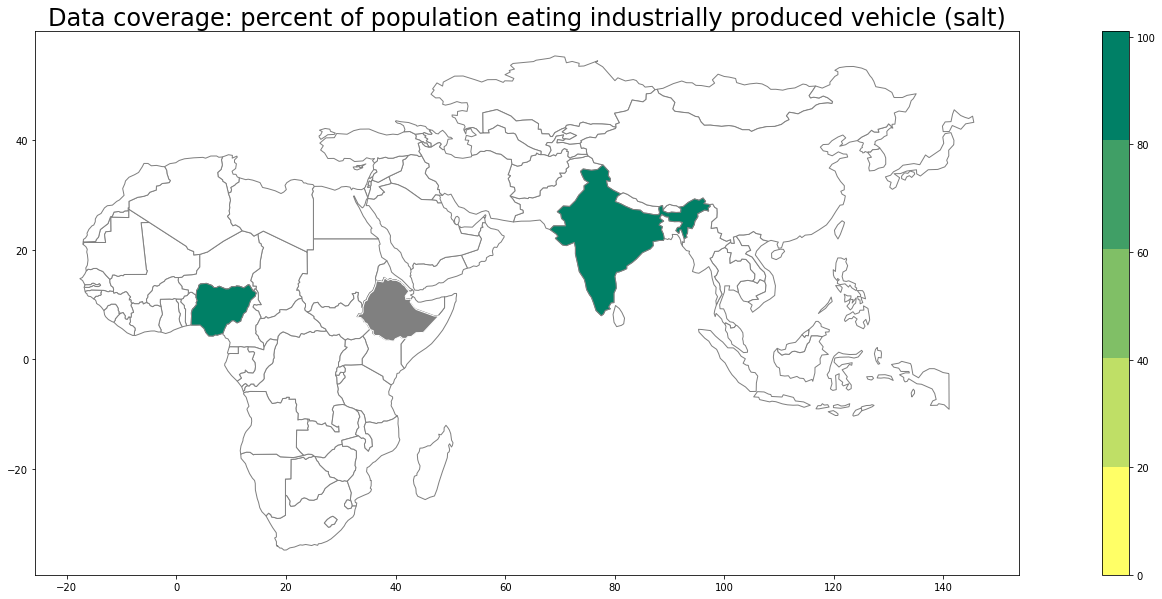

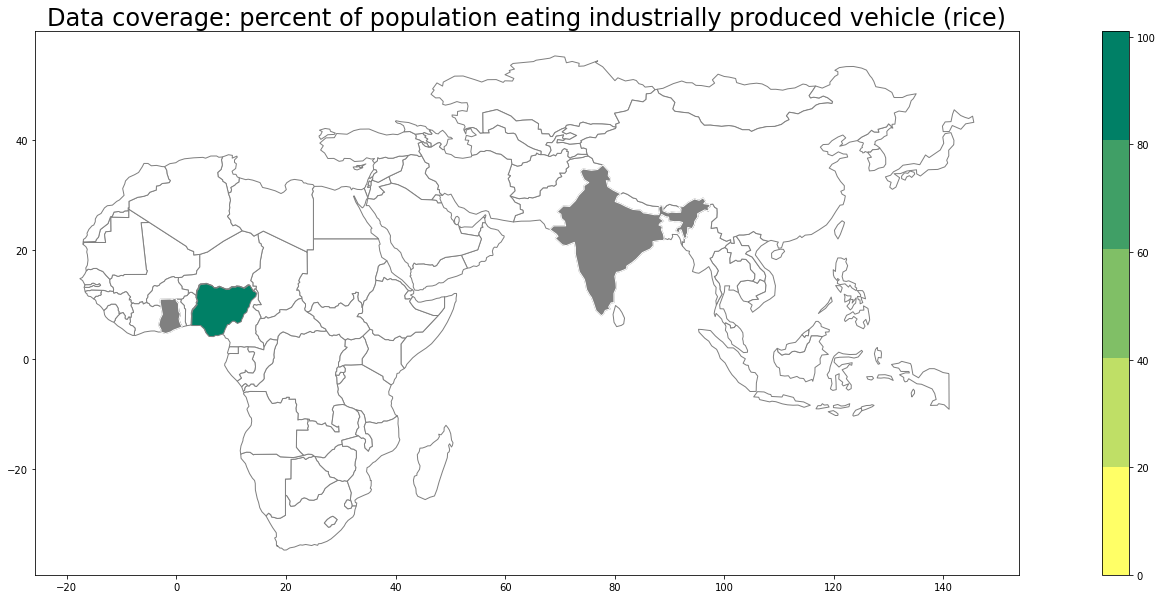

In [15]:
plot_one_var('percent of population eating industrially produced vehicle', '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/pct_eating_ind_prod.pdf')

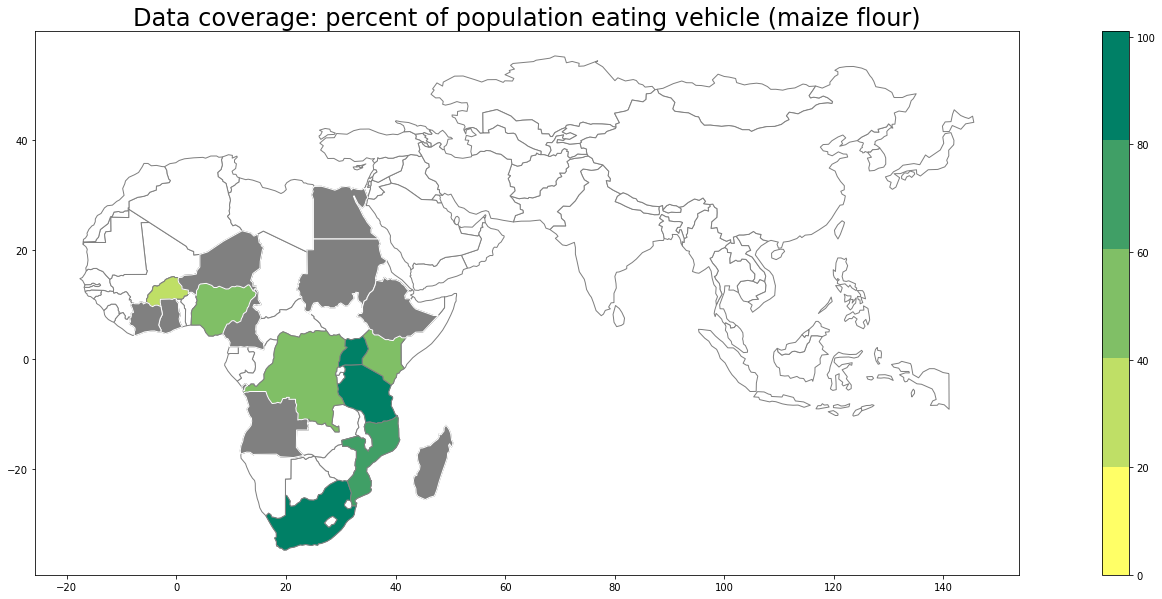

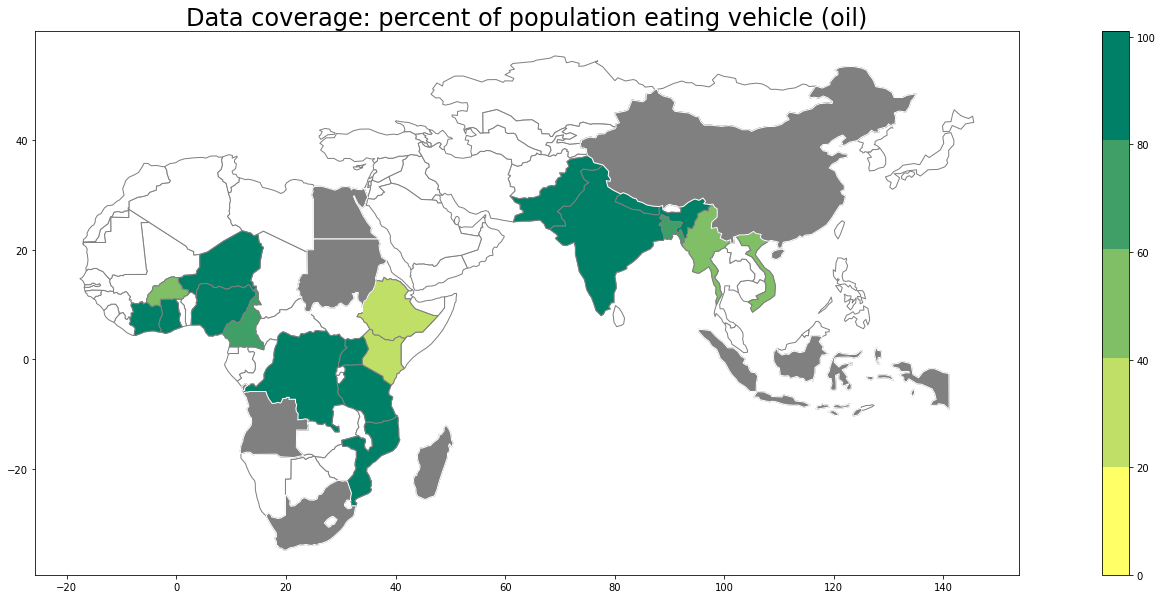

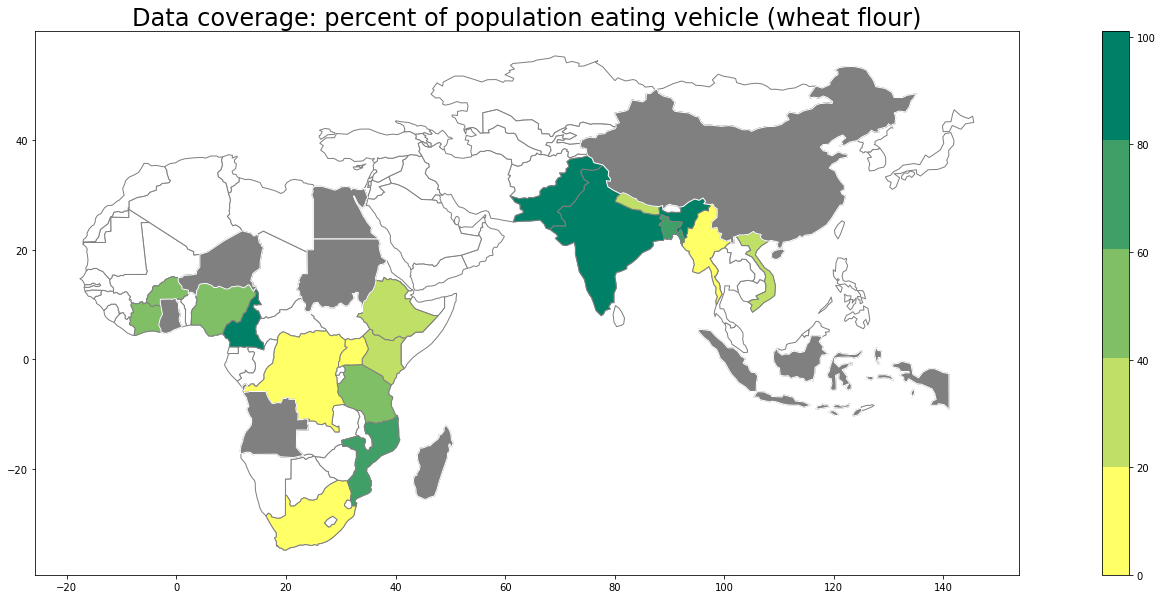

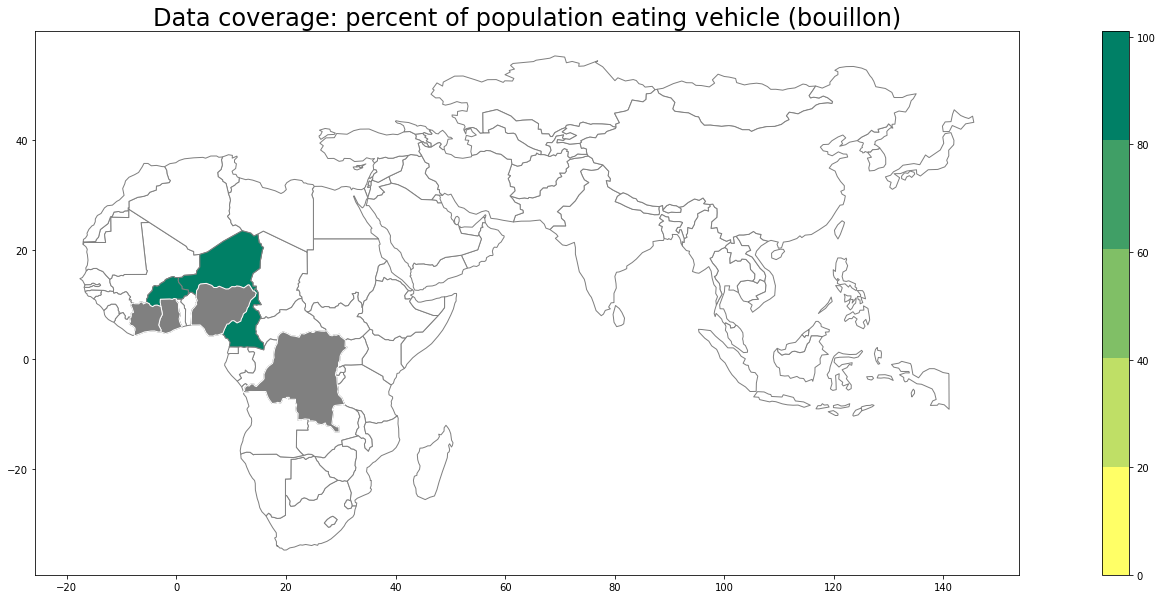

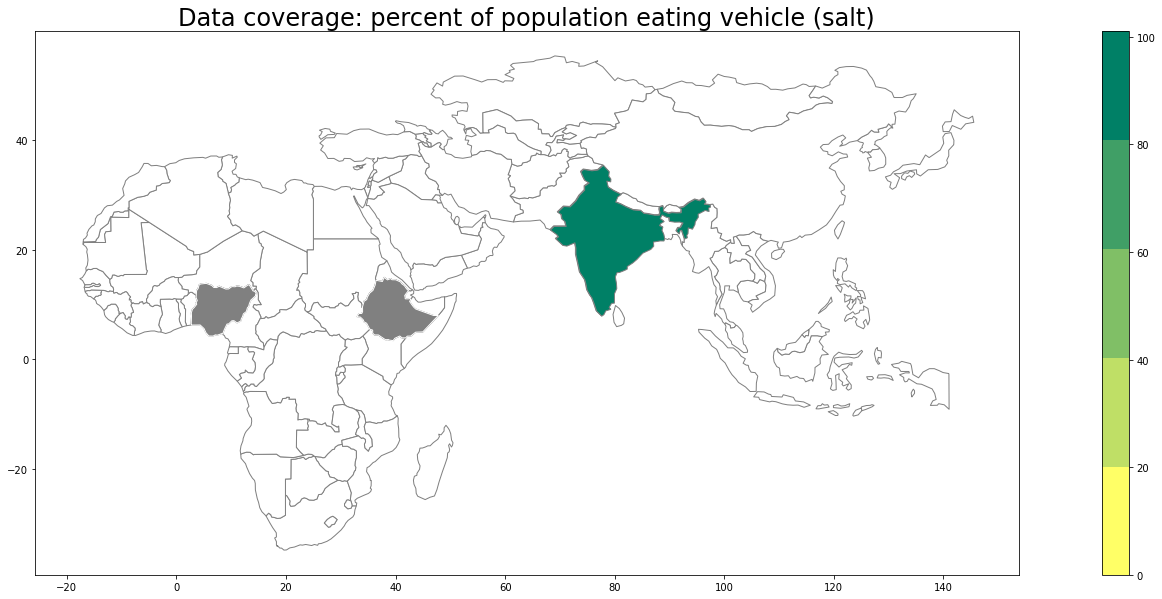

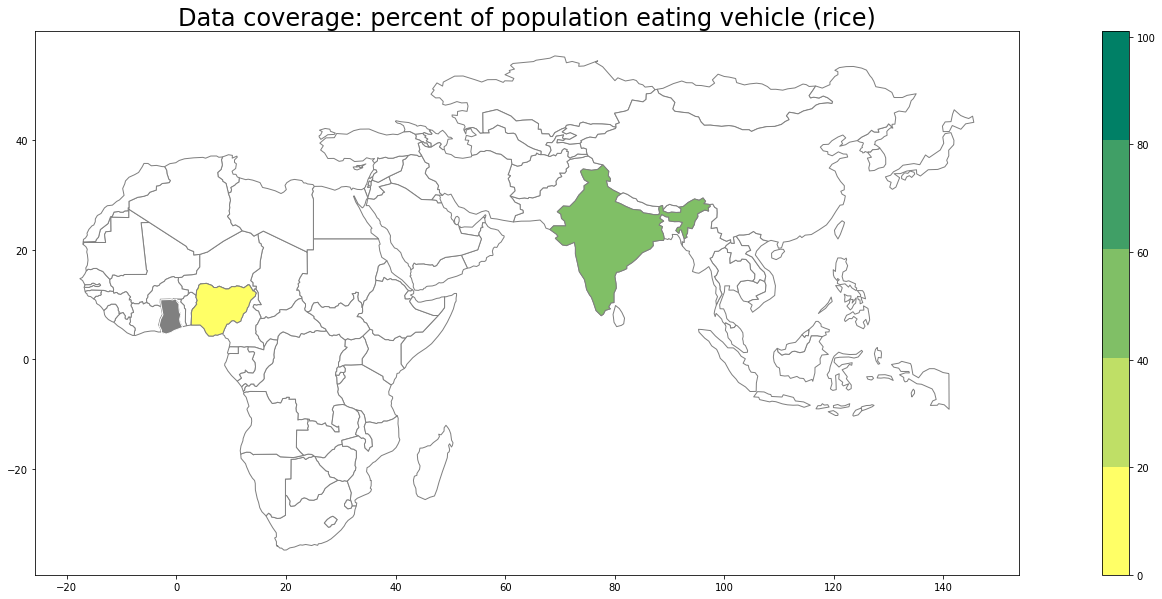

In [16]:
plot_one_var('percent of population eating vehicle', '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/pct_eating_vehicle.pdf')

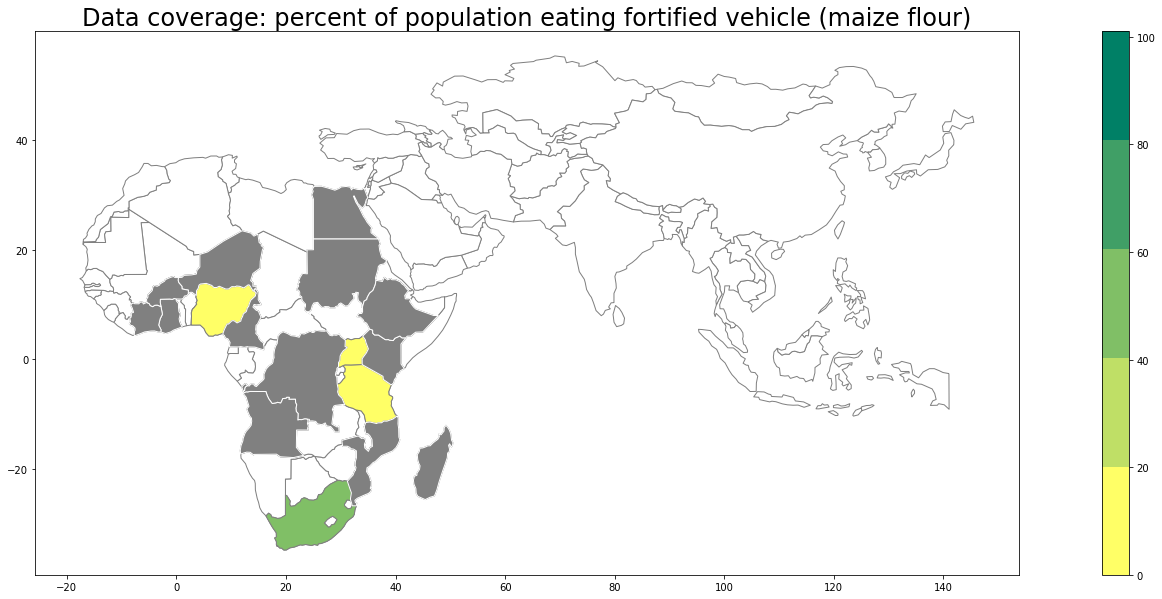

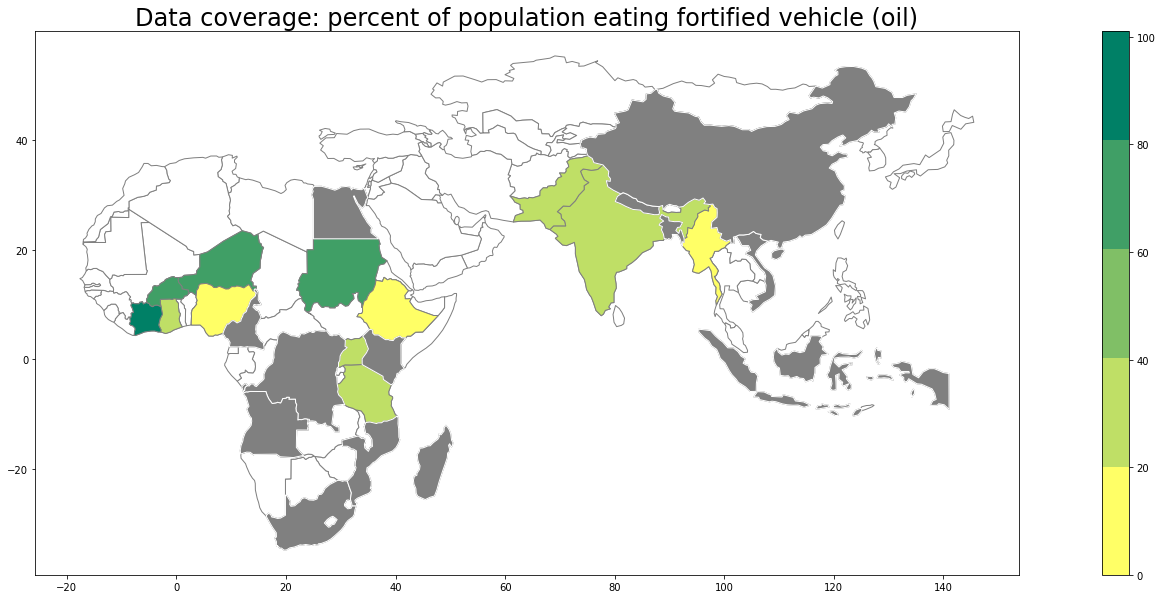

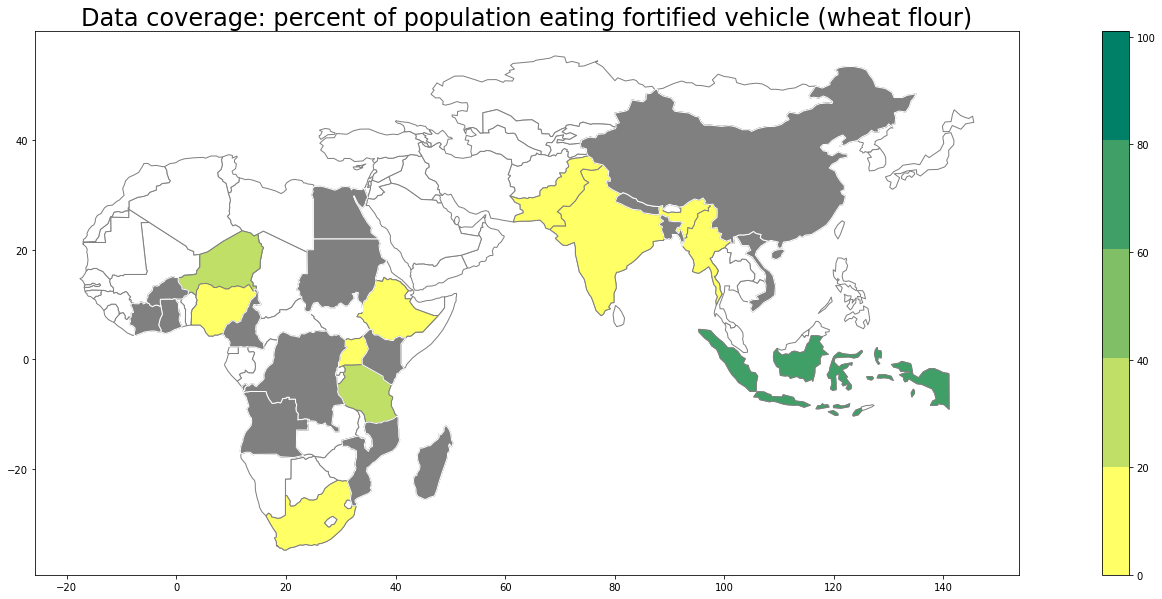

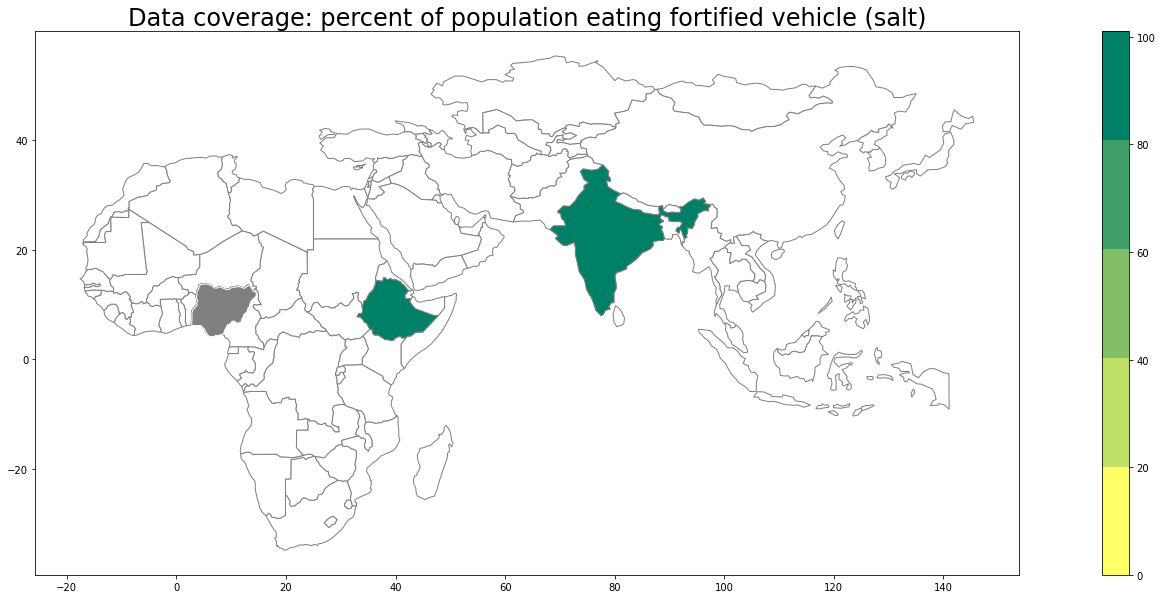

In [17]:
plot_one_var('percent of population eating fortified vehicle', '/ihme/homes/beatrixh/notebooks/viv_rsc/new_lsff/outputs/plots/pct_eating_fortified_vehicle.pdf')

In [390]:
## for these last two you need to fix the list of target countries

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


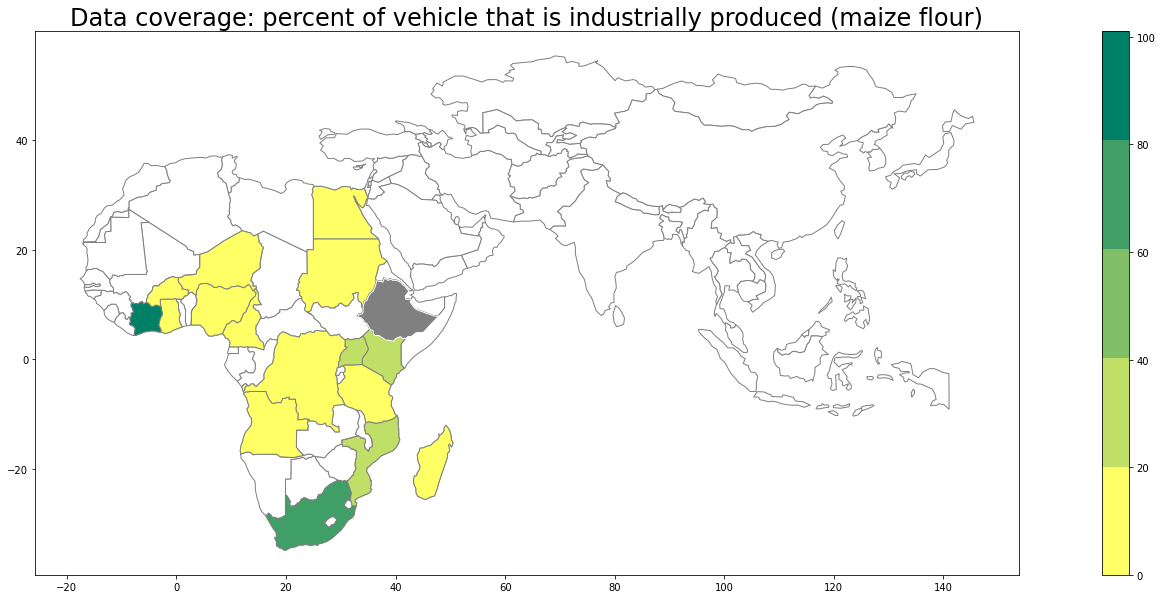

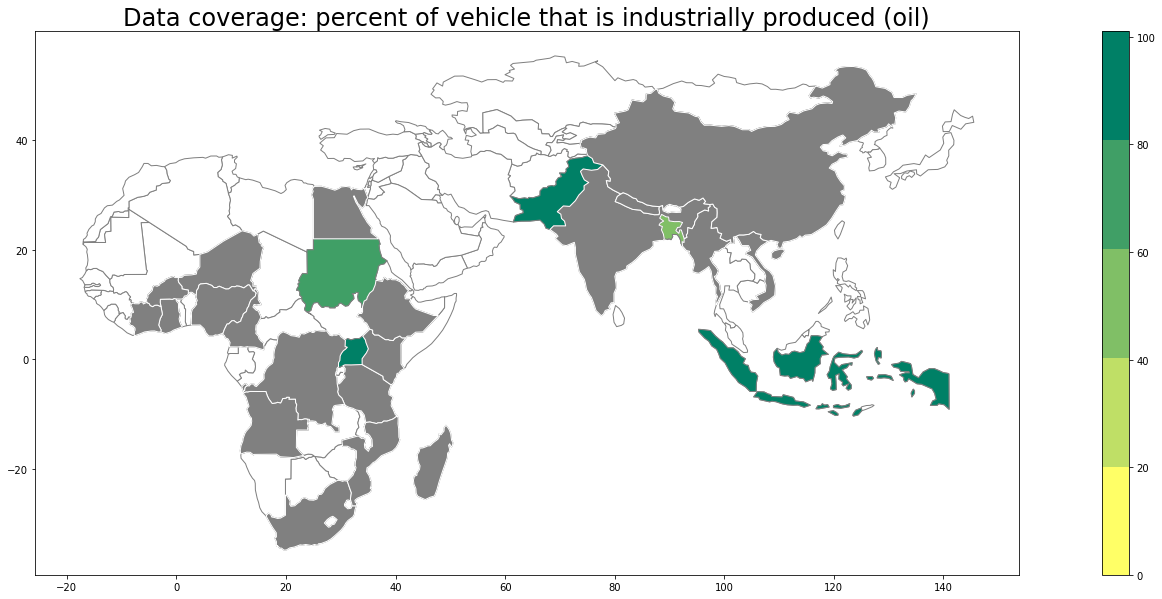

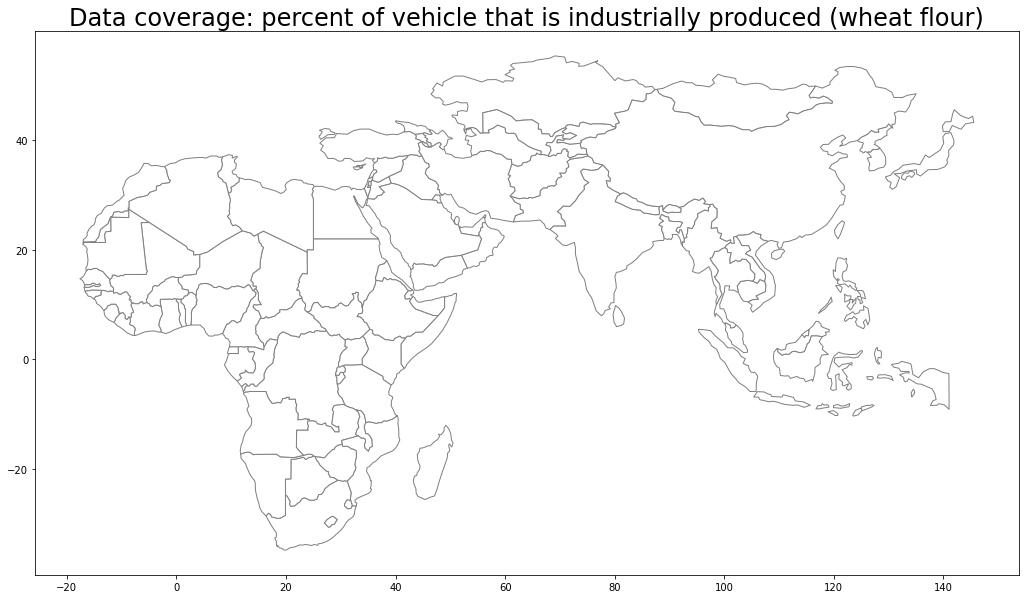

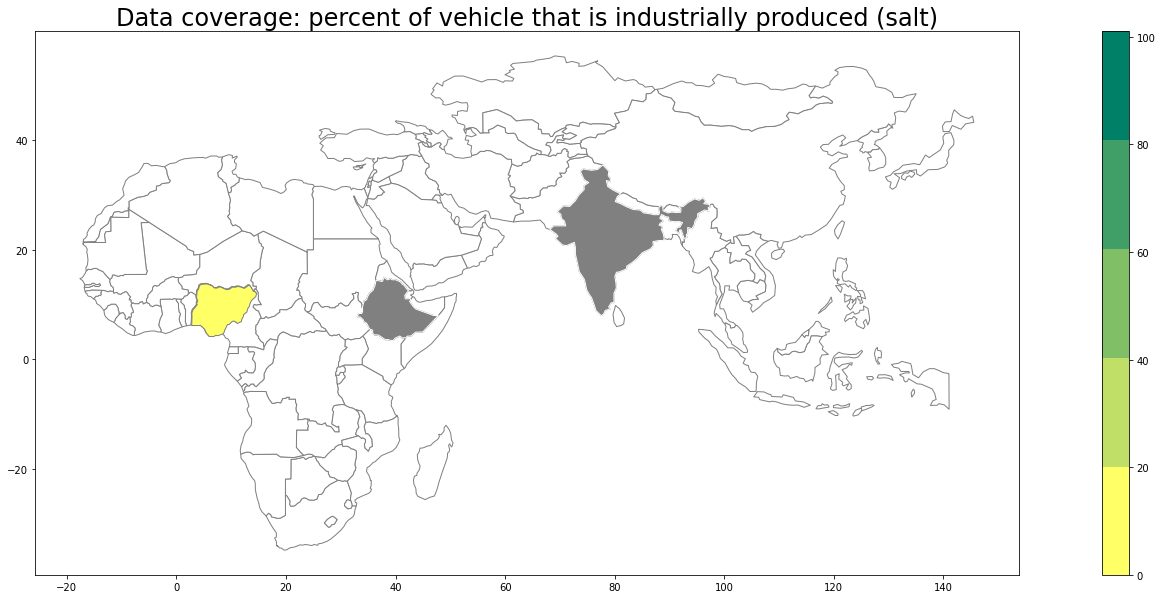

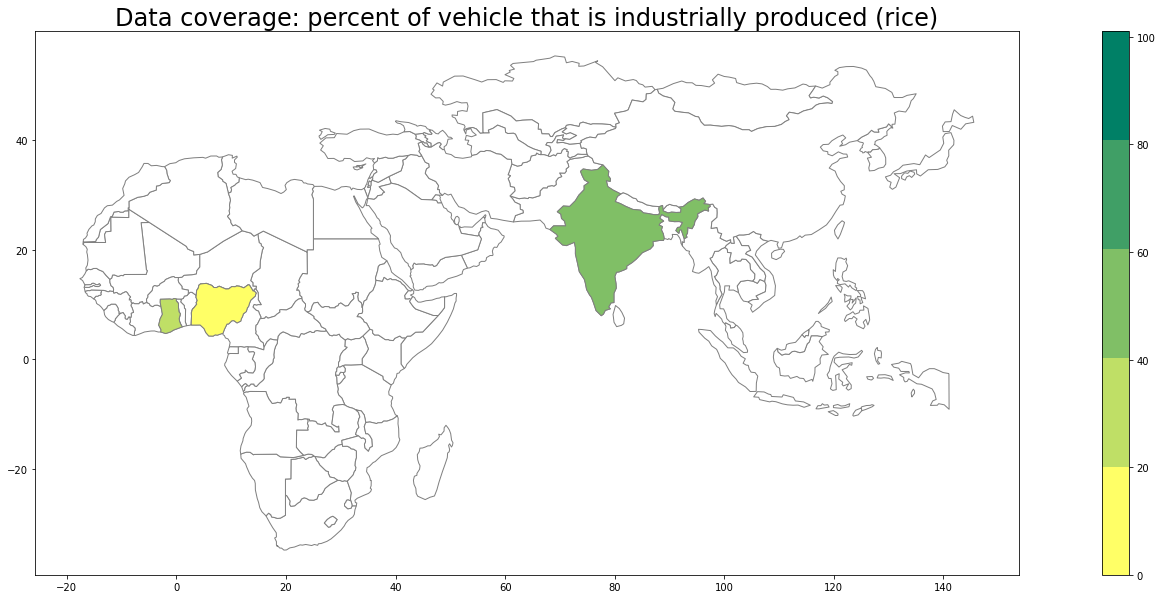

In [14]:
plot_one_var('percent of vehicle that is industrially produced', '/homes/beatrixh/repos/scratch/pct_vehicle_indust_prod_summer.pdf')

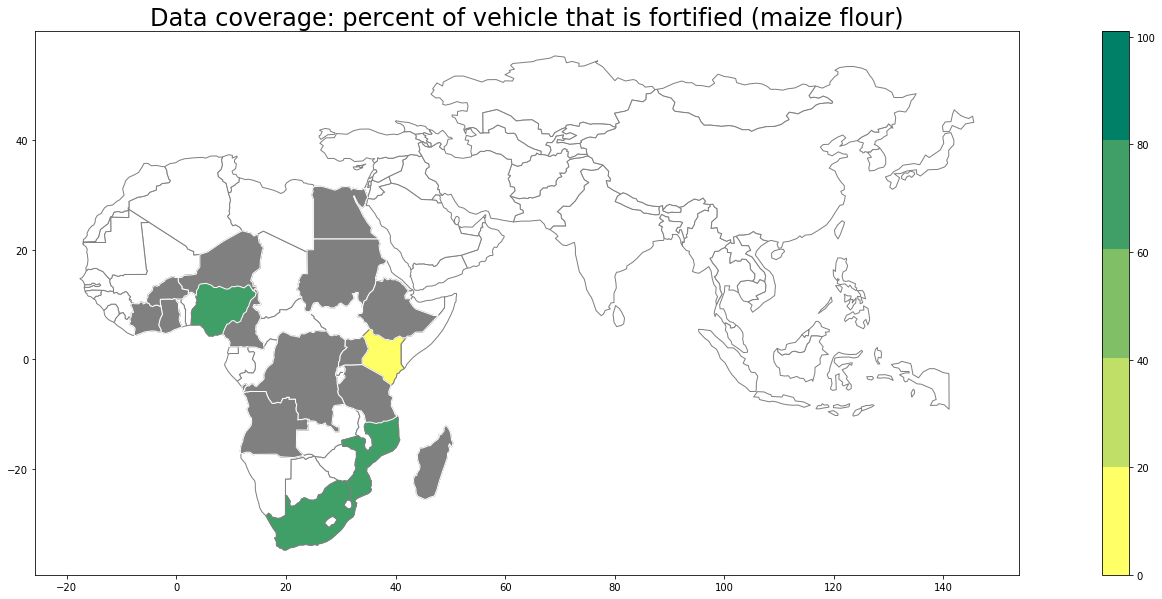

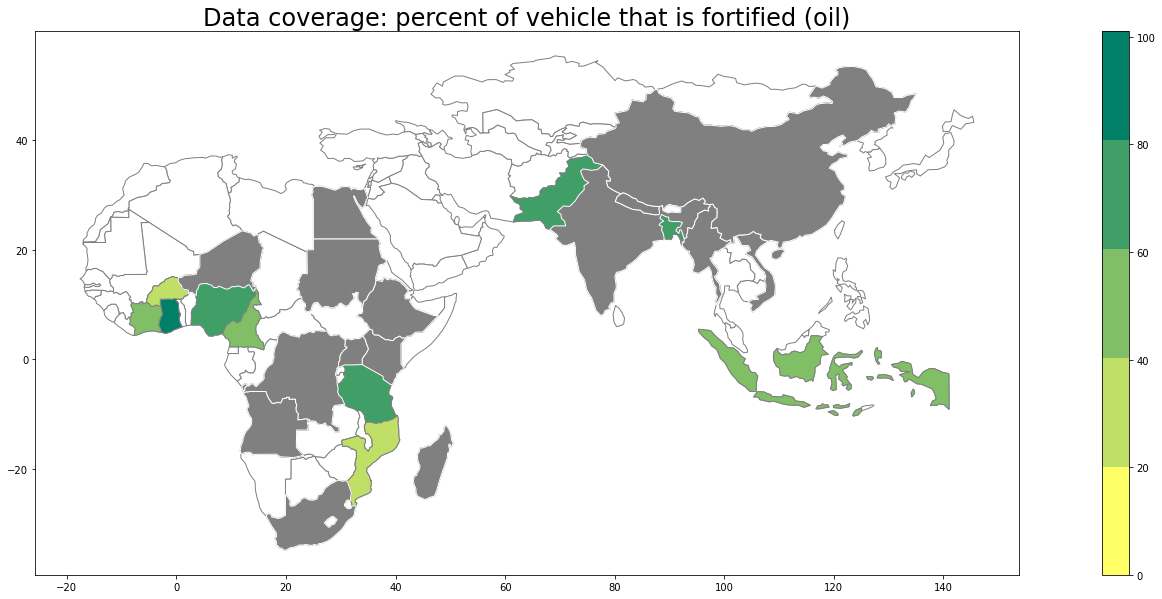

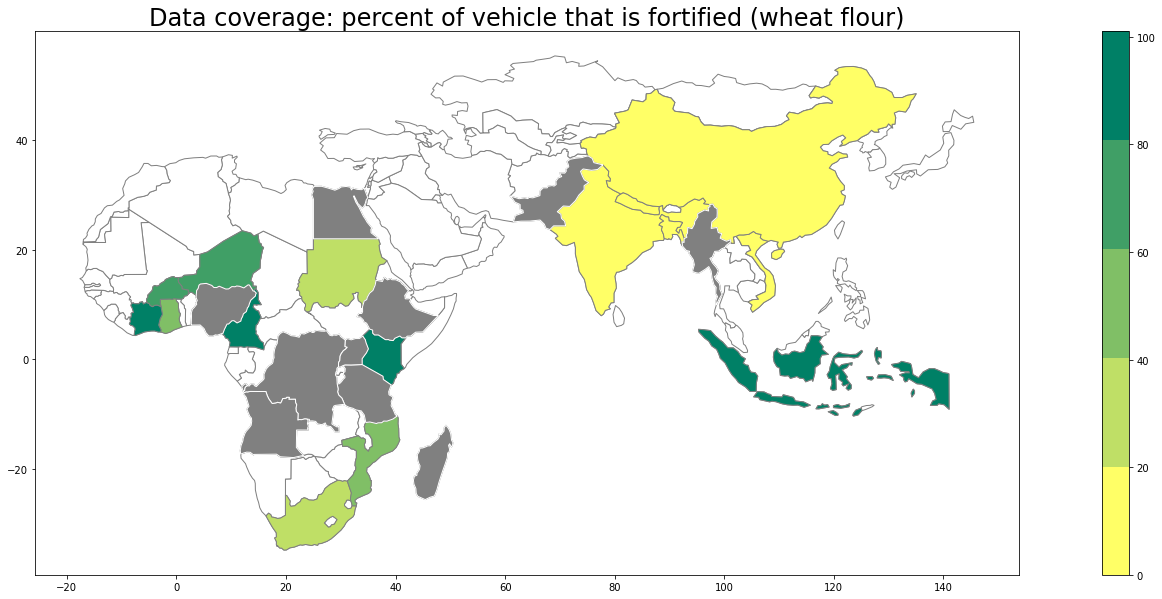

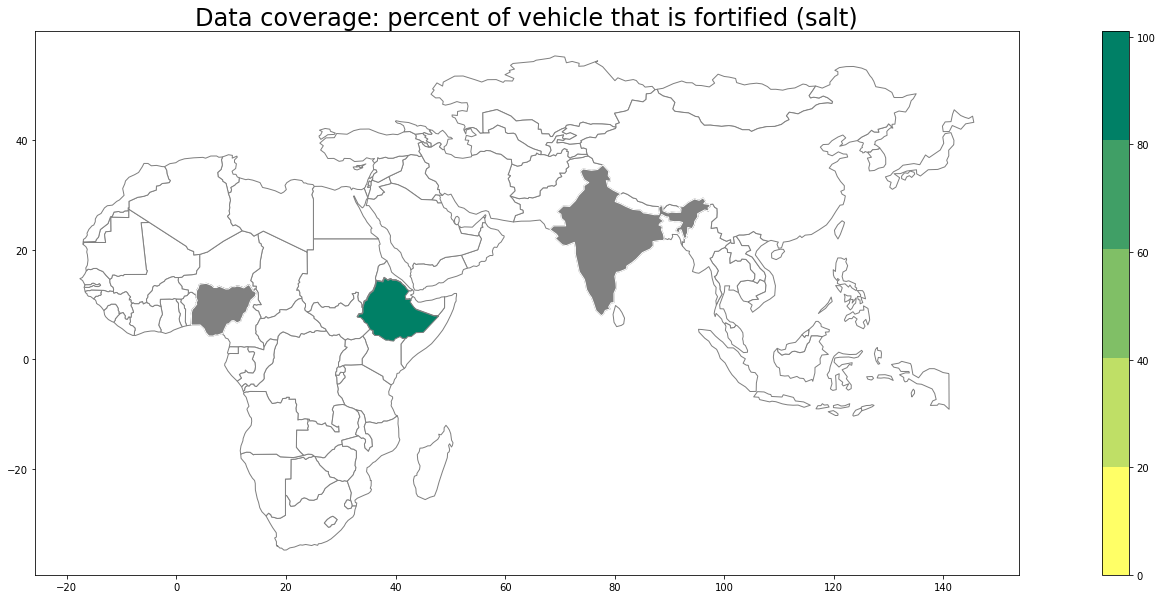

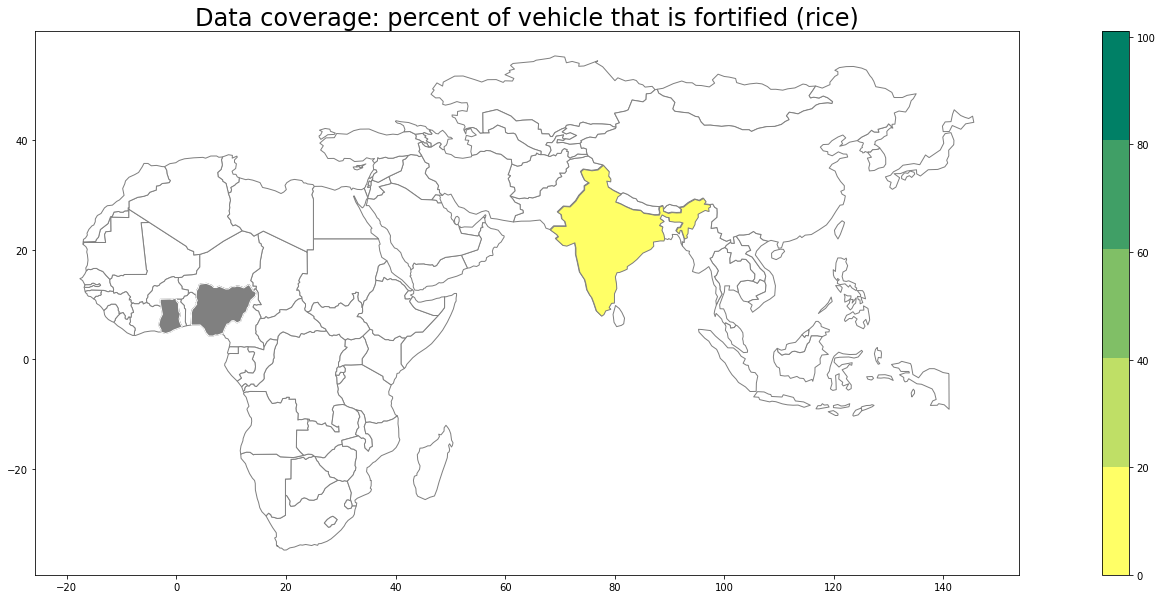

In [383]:
plot_one_var('percent of vehicle that is fortified', '/homes/beatrixh/repos/scratch/pct_vehicle_fortified_summer.pdf')